Перед началом работы нужно установить библиотеки. Либо по одной через pip install <наименование>, либо добавить их в requirements.txt и установить библиотеки из него с помощью команды pip install -r requirements.txt   

Нам понадобится всего 3:

pandas

matplotlib (в коде импортируем как matplotlib.pyplot)

seaborn

Можно обойтись и без seaborn.

Почти все подписи и комменты в задаче на экзамене пропускать - нет смысла на косметику тратить время, разве что в 14 задании.

**Задача 13**

По большей части в задаче 13 можно не использовать графики. Кроме задания Г, в нём нужно проанализировать рейтинг и год. Корреляция не скажет нам, растёт рейтинг или падает итп.

Для поиска зависимостей между столбцами можно использовать корреляцию.

Для распределения используем дисперсию (разброс значений).

Стоит так же визуально оценить датасет. Если в нём кривые заголовки, то исправить их проще в коде (избавляемся от спецсимволов). Спецсимволы можно менять на пробел.

Так же стоит проверить хотя бы первые 100 строк датасета, могут быть пустые значения в столбцах, это нужно будет учитывать.

Проценты меняем на число (float). Так мы избежим ошибок при вычислении корреляции.

Для анализа данных, например, процент к рейтингу - используем индексацию данных через рейтинг.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение и вывод датасета.
data = pd.read_csv('data/flavors_of_cacao.csv')
# Заголовки в датасете идут с переходом на новую строку. 
# Очистка заголовков от спецсимволов /n. Заменяем их на пробел.
data.columns = [col.replace('\n', ' ').strip() for col in data.columns]
display(data.head(100))

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
95,Ara,Madagascar,1375,2014,75%,France,3.00,Trinitario,Madagascar
96,Ara,Chiapas,1379,2014,72%,France,2.50,,Mexico
97,Ara,Equateur,1379,2014,75%,France,2.75,,Ecuador
98,Ara,Trincheras,1379,2014,75%,France,3.00,,Venezuela


Из интересного - тип бобов есть далеко не у всех строк. Скорее всего это нужно будет учитывать.

**A) Существует ли зависимость между процентом содержания какао и рейтингом шоколадных батончиков? Какой процент содержания какао имеет наивысший средний рейтинг?**

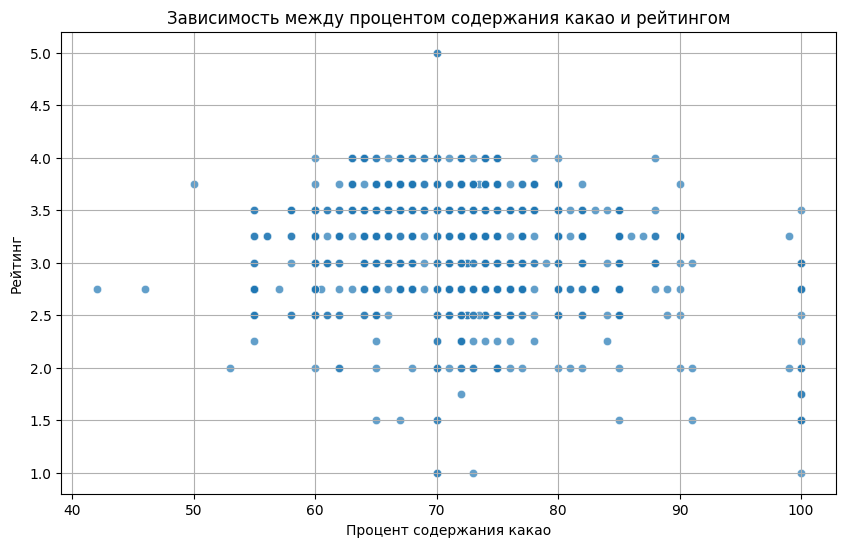

In [128]:
# Для работы с % преобразуем их из строк в числа.
# Преобразование столбца "Cocoa Percent" в числовой формат.
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '').astype(float)

# Построение графика зависимости между процентом содержания какао и рейтингом.
# По идеи ответ можно дать и без графика используя корреляцию.
# ИМХО - для экономии времени лучше пропустить график.
plt.figure(figsize=(10, 6))
plt.scatter(data['Cocoa Percent'], data['Rating'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Зависимость между процентом содержания какао и рейтингом')
plt.xlabel('Процент содержания какао')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()

In [129]:
# Группировка данных по проценту содержания какао и вычисление среднего рейтинга.
# Группируем по столбцу Cocoa Percent, добавляем индекс на основе Rating и вычисляет среднее значение Rating для каждой группы Cocoa Percent.
# .mean - среднее значение.
average_rating = data.groupby('Cocoa Percent')['Rating'].mean().reset_index()

# Нахождение процента содержания какао с наивысшим средним рейтингом.
# .loc - доступ к группе по индексам.
# .idxmax - получение максимального индекса.
max_average_rating = average_rating.loc[average_rating['Rating'].idxmax()]

print(f"Процент какао с наивысшим средним рейтингом: {max_average_rating['Cocoa Percent']}%, Средний рейтинг: {max_average_rating['Rating']}")

# Вычисление корреляции между процентом содержания какао и рейтингом.
# Если графика не достаточно, то считаем корреляцию (так даже быстрее).
correlation = data['Cocoa Percent'].corr(data['Rating'])
print(f"Корреляция: {correlation}")

Процент какао с наивысшим средним рейтингом: 50.0%, Средний рейтинг: 3.75
Корреляция: -0.1648201776242446


Вывод: зависимости нет (корреляция близка к 0). 50%

**Б) Каково распределение рейтингов среди компаний из разных стран? Влияет ли местоположение компании на рейтинг шоколадных батончиков?**

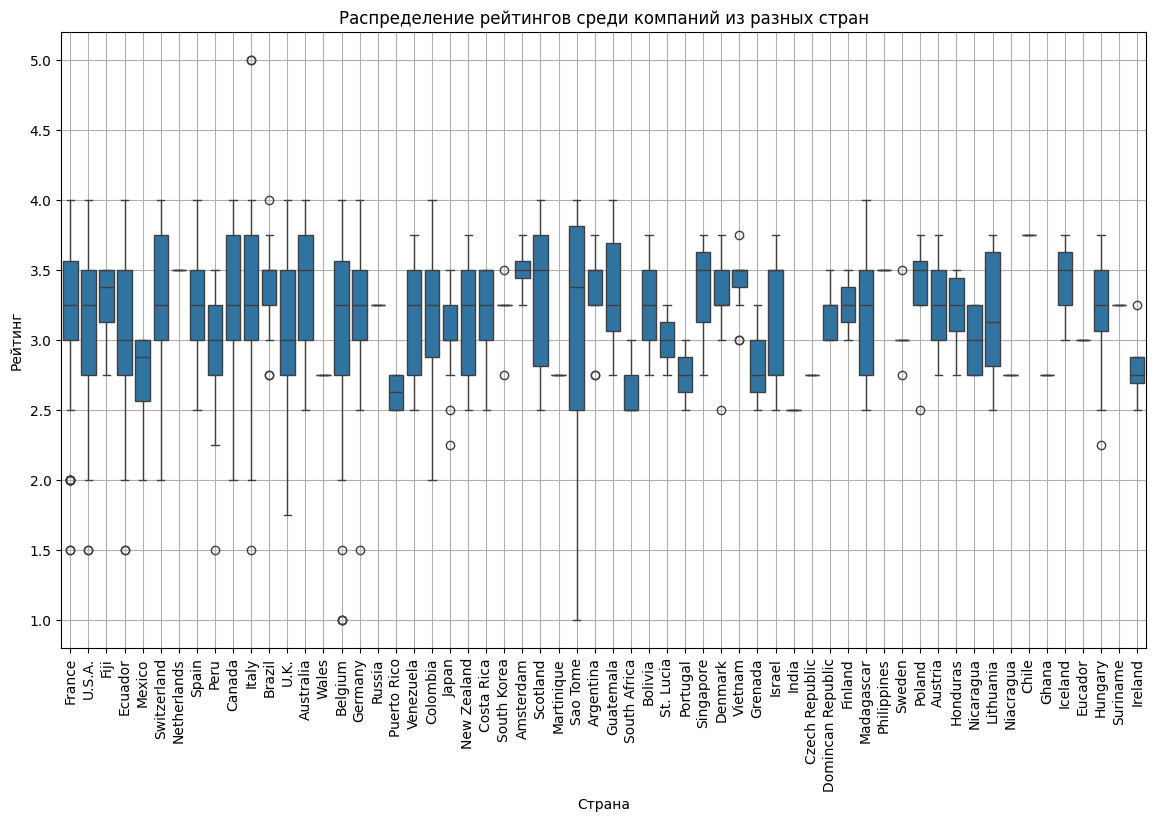

In [130]:
# Построение графика распределения рейтингов среди компаний из разных стран
# Аналогично - график излишен.
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Location', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('Распределение рейтингов среди компаний из разных стран')
plt.xlabel('Страна')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()

In [131]:
# Вычисление среднего рейтинга для каждой страны.
# Группируем по столбцу Company Location, добавляем индекс на основе Rating и вычисляет среднее значение Rating для каждой группы Company Location.
country_avg_rating = data.groupby('Company Location')['Rating'].mean().reset_index()

# Нахождение страны с наивысшим средним рейтингом
max_avg_rating_country = country_avg_rating.loc[country_avg_rating['Rating'].idxmax()]

print(f"Страна с наивысшим средним рейтингом: {max_avg_rating_country['Company Location']}, Средний рейтинг: {max_avg_rating_country['Rating']}")

# Расчет общей дисперсии рейтингов
# .var - вычисление дисперсии. 
overall_variance = data['Rating'].var()

# Расчет дисперсии рейтингов внутри каждой страны
within_country_variance = data.groupby('Company Location')['Rating'].var().mean()

print(f"Общая дисперсия рейтингов: {overall_variance}")
print(f"Средняя дисперсия рейтингов внутри стран: {within_country_variance}")

Страна с наивысшим средним рейтингом: Chile, Средний рейтинг: 3.75
Общая дисперсия рейтингов: 0.22854365216148756
Средняя дисперсия рейтингов внутри стран: 0.20530361984423556


Вывод: Общая дисперсия выше, чем средняя по стране, но не сильно, значит распределение между странами не значительное. Т.к. средняя дисперсия внутри страны и общая почти равны, то расположение компании не оказывает существенного влияния.

**В) Каков средний рейтинг батончиков, произведенных из разных типов какао-бобов? Существует ли тип бобов, который стабильно получает более высокие рейтинги?**

Тип какао-бобов с наивысшим средним рейтингом: Criollo (Ocumare 67), Средний рейтинг: 4.0


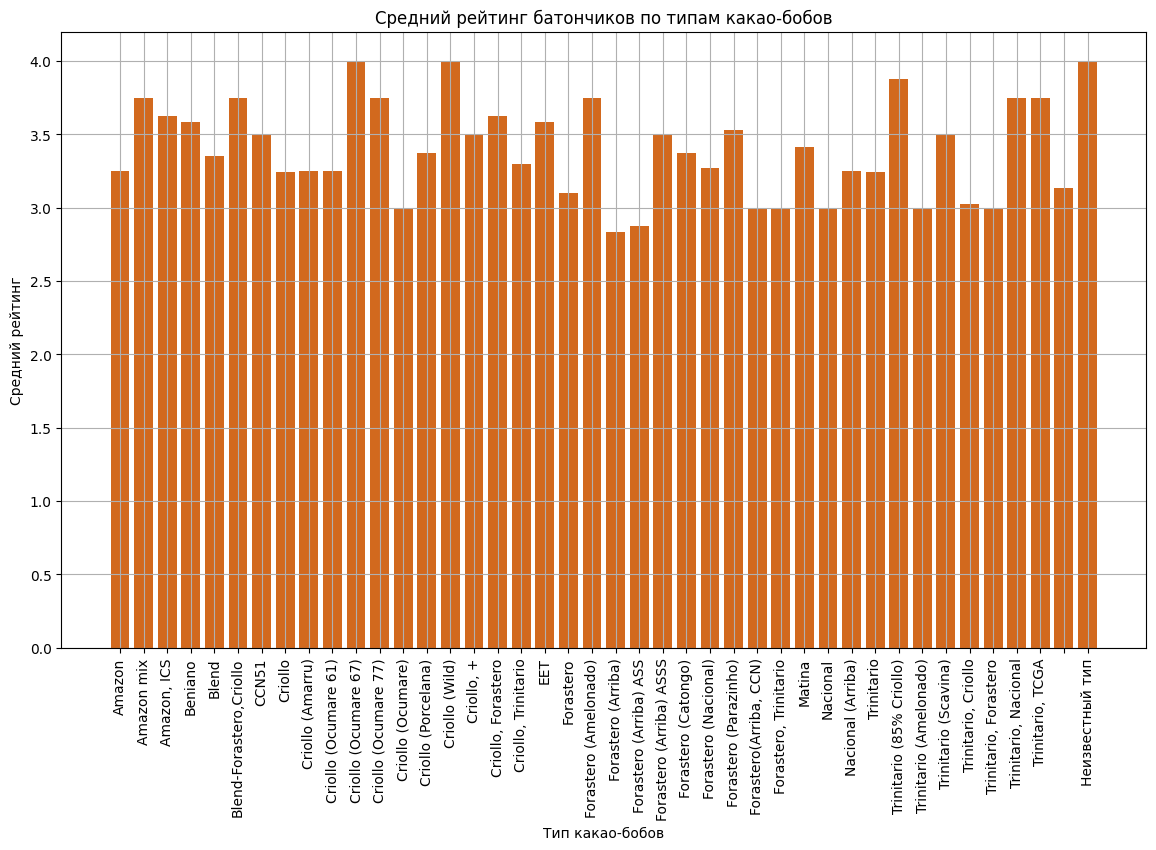

In [132]:
# Вроде как в датасете для типов есть пропуски. Можно объединить такие значения в отдельную группу.
# Заполнение пропусков в столбце "Bean Type" значением "Неизвестный тип".
# .fillna - заполнение пропусков значением.
data['Bean Type'] = data['Bean Type'].fillna('Неизвестный тип')

# Вычисление среднего рейтинга для каждого типа какао-бобов.
bean_type_avg_rating = data.groupby('Bean Type')['Rating'].mean().reset_index()

# Нахождение типа бобов с наивысшим средним рейтингом.
max_avg_rating_bean_type = bean_type_avg_rating.loc[bean_type_avg_rating['Rating'].idxmax()]

print(f"Тип какао-бобов с наивысшим средним рейтингом: {max_avg_rating_bean_type['Bean Type']}, Средний рейтинг: {max_avg_rating_bean_type['Rating']}")

# Построение графика среднего рейтинга для каждого типа какао-бобов
plt.figure(figsize=(14, 8))
plt.bar(bean_type_avg_rating['Bean Type'], bean_type_avg_rating['Rating'], color='chocolate')
plt.title('Средний рейтинг батончиков по типам какао-бобов')
plt.xlabel('Тип какао-бобов')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Вывод: 4.0  Criollo (Ocumare 77)

**Г) Существует ли связь между годом обзора и рейтингом шоколадных батончиков? Изменился ли средний рейтинг шоколадных батончиков с течением времени?**

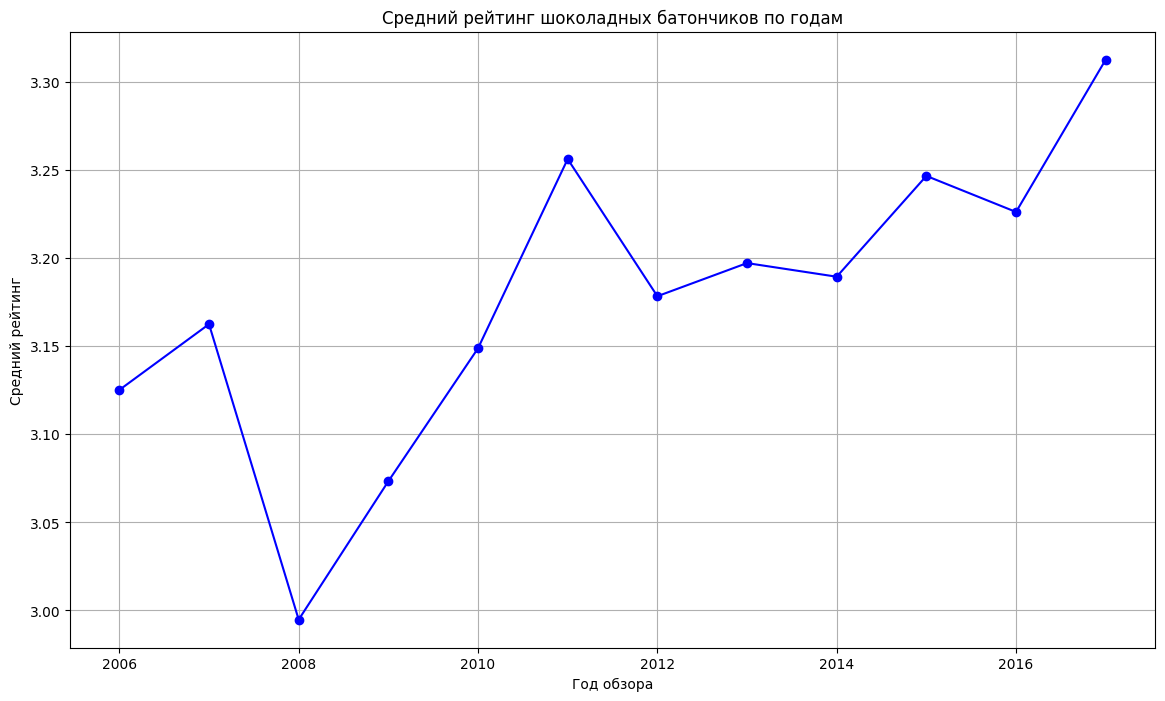

Корреляция между годом обзора и рейтингом: 0.09984649614500139


In [133]:
# Группировка данных по году обзора и вычисление среднего рейтинга.
year_avg_rating = data.groupby('Review Date')['Rating'].mean().reset_index()

# Построение графика среднего рейтинга по годам.
plt.figure(figsize=(14, 8))
plt.plot(year_avg_rating['Review Date'], year_avg_rating['Rating'], marker='o', linestyle='-', color='b')
plt.title('Средний рейтинг шоколадных батончиков по годам')
plt.xlabel('Год обзора')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

# Вычисление корреляции между годом обзора и рейтингом
correlation = data['Review Date'].corr(data['Rating'])
print(f"Корреляция между годом обзора и рейтингом: {correlation}")

Вывод: связь существует (корреляция близка к 1). Начиная с 2008 рейтинг в основном растёт.

**Задание 14**

Для задания 14 нам понадобится библиотека seaborn. С ней будет немного проще строить именно датаграммы. Тип датаграммы наверное не так важен. Проще всего использовать гистограмм и коробчатых датаграмм. Можно попробовать и круговые. Но т.к. вывод к датаграммам нам не нужен, то и разницы никакой не будет. Возможно на собесе спросят, если будет разбор по типу того, почему тут именно такой ответ/график итд.

Если есть какие-то наименования по оси X, то удобнее повернуть их на 90 градусов, для лучшей читаемости графика.

**Построить диаграмму(ы), показывающие распределение процентов содержания какао в батончиках с разными рейтингами.**

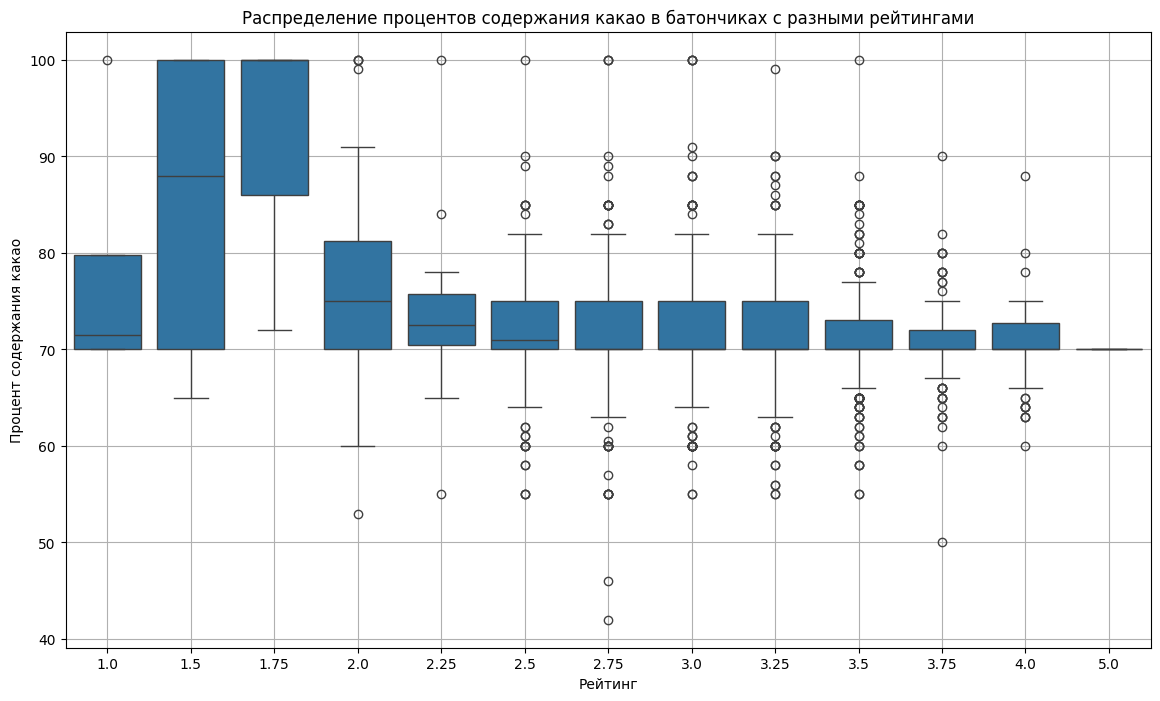

In [134]:
# Построение коробчатой диаграммы для визуализации распределения процентов содержания какао в батончиках с разными рейтингами
plt.figure(figsize=(14, 8))
sns.boxplot(x='Rating', y='Cocoa Percent', data=data)
plt.title('Распределение процентов содержания какао в батончиках с разными рейтингами')
plt.xlabel('Рейтинг')
plt.ylabel('Процент содержания какао')
plt.grid(True)
plt.show()

**Построить диаграмму(ы), показывающие средний рейтинг шоколадных батончиков в зависимости от местоположения компании.**

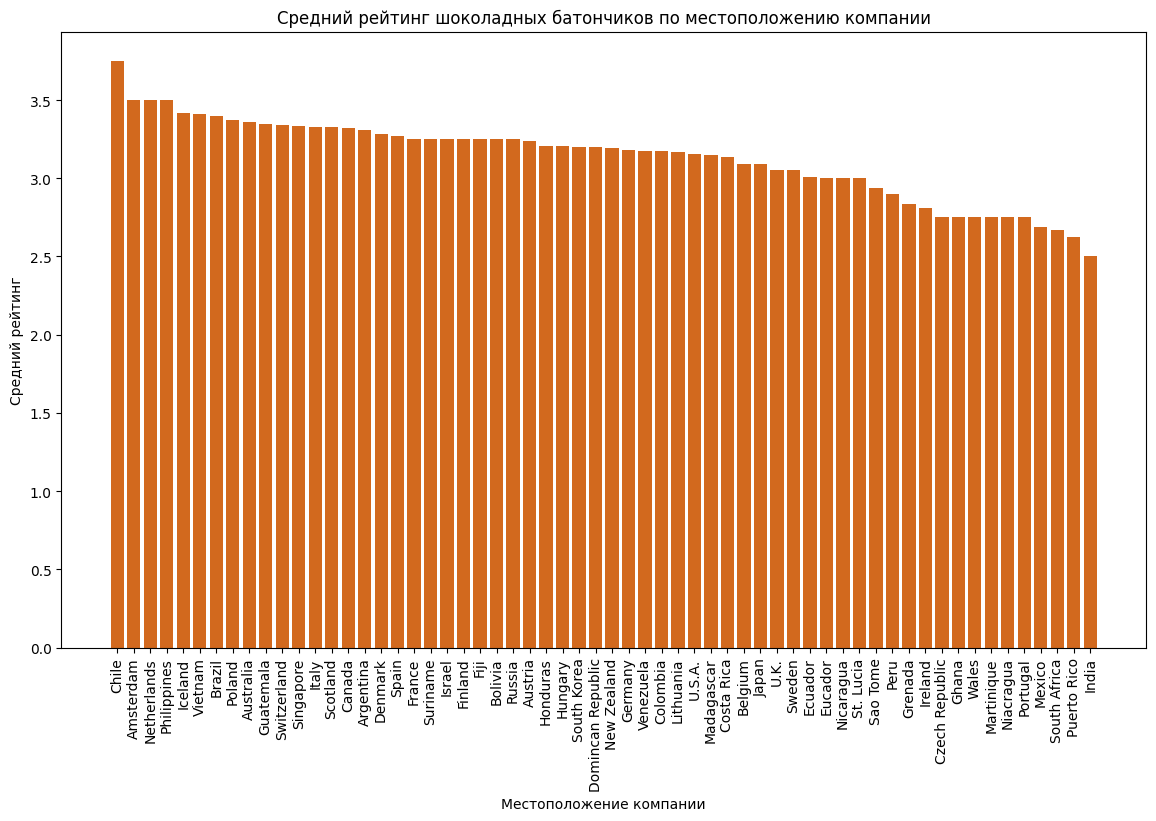

In [135]:
# Вычисление среднего рейтинга для каждой страны.
country_avg_rating = data.groupby('Company Location')['Rating'].mean().reset_index()

# Сортировка данных по среднему рейтингу.
# .sort_values - сортировка по значению.
country_avg_rating = country_avg_rating.sort_values(by='Rating', ascending=False)

# Построение диаграммы.
plt.figure(figsize=(14, 8))
plt.bar(country_avg_rating['Company Location'], country_avg_rating['Rating'], color='chocolate')
plt.title('Средний рейтинг шоколадных батончиков по местоположению компании')
plt.xlabel('Местоположение компании')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=90)
plt.grid(False) # Отключил сетку
plt.show()